In [2]:
import cv2
import numpy as np 
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt


In [3]:
input_dir = 'C:/Users/liang/OneDrive/Desktop/Maplestory-Classifier' 

In [4]:
data = []
labels = []
categories = ['Mushmom_Classification',
              'Poisonous_Mushroom_Classification',
              'Horny_Mushroom_Classification',
              'Green_Mushroom_Classification', 
              'Blue_Mushmom_Classification', 
              'Zombie_Mushmom_Classification'] 

In [5]:
for category_idx , category in enumerate(categories): 
    for file in os.listdir(os.path.join(input_dir,category)):   
        img_path = os.path.join(input_dir,category,file)
        img = imread(img_path)
        img = resize(img,(70,75))        
        #data.append(img.flatten())
        data.append(img)
        labels.append(category)

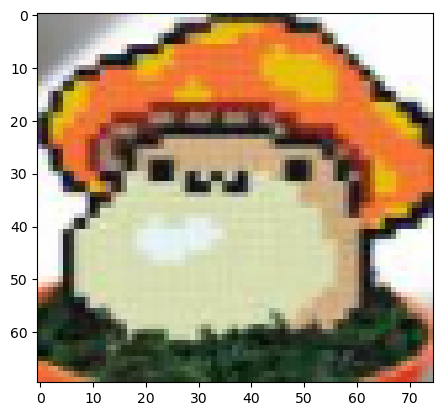

In [6]:
plt.imshow(data[6])

In [7]:
'''import os
from PIL import Image

# set the directory path
directory = 'C:/Users/liang/OneDrive/Desktop/Maplestory-Classifier/Blue_Mushmom_Classification'


# loop through all files in directory
for filename in os.listdir(directory):
    if filename.endswith('.png'):
        # open the PNG file
        png_image = Image.open(os.path.join(directory, filename))
        
        # convert the PNG image to JPEG
        jpg_image = png_image.convert('RGB')
        
        # save the JPEG file with the same name as the PNG file
        new_filename = os.path.splitext(filename)[0] + '.jpg'
        jpg_image.save(os.path.join(directory, new_filename))'''


"import os\nfrom PIL import Image\n\n# set the directory path\ndirectory = 'C:/Users/liang/OneDrive/Desktop/Maplestory-Classifier/Blue_Mushmom_Classification'\n\n\n# loop through all files in directory\nfor filename in os.listdir(directory):\n    if filename.endswith('.png'):\n        # open the PNG file\n        png_image = Image.open(os.path.join(directory, filename))\n        \n        # convert the PNG image to JPEG\n        jpg_image = png_image.convert('RGB')\n        \n        # save the JPEG file with the same name as the PNG file\n        new_filename = os.path.splitext(filename)[0] + '.jpg'\n        jpg_image.save(os.path.join(directory, new_filename))"

In [10]:
len(labels)

79

In [11]:
len(data)

79

In [14]:
data

[array([[[0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         ...,
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059]],
 
        [[0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         ...,
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059]],
 
        [[0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         ...,
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647059]],
 
        ...,
 
        [[0.99607843, 1.        , 0.97647059],
         [0.99607843, 1.        , 0.97647

In [16]:
data[0]

array([[[0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        ...,
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059]],

       [[0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        ...,
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059]],

       [[0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        ...,
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059]],

       ...,

       [[0.99607843, 1.        , 0.97647059],
        [0.99607843, 1.        , 0.97647059],
        [0.99607843, 1

<h1 style="font-size:24px; font-family: Arial, sans-serif;"> Images </h1>

<h1 style="font-size:24px; font-family: Arial, sans-serif;"> --->  Stuck HERE  <--- </h1>


In [20]:
list = os.listdir(os.path.join(input_dir,category))
list2 = list[0]

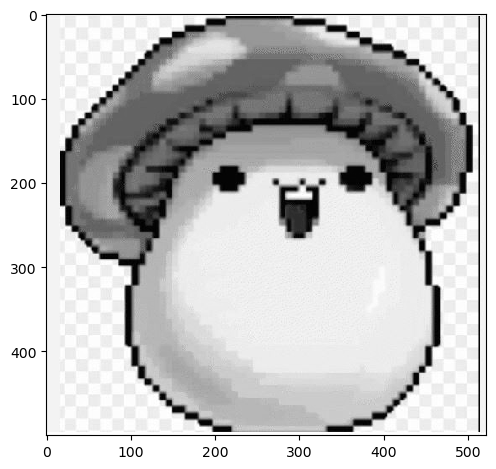

In [23]:
import numpy as np
from skimage import io, color

# Load image
img = io.imread('Capture2.JPG')

img_path = os.path.join(input_dir,category,list2)

# Convert image to grayscale
img_gray = color.rgb2gray(img)

# Flatten image array
img_flat = np.reshape(img_gray, (img_gray.shape[0], -1))

# Display flattened image
io.imshow(img_flat)
io.show()


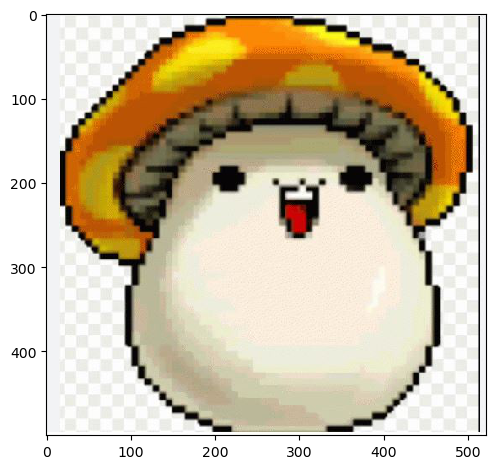

array([[[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[253, 254, 255],
        [253, 254, 255],
        [253, 254, 255],
        ...,
        [243, 244, 246],
        [253, 254, 255],
        [253, 254, 255]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [243, 243, 243],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]]

In [25]:
import numpy as np
from skimage import io

# Load image
img = io.imread('Capture2.JPG')

# Reshape image to have three channels for each pixel
img_flat = img.reshape((img.shape[0], -1, 3))

# Display flattened image
io.imshow(img_flat)
io.show()



img_flat


In [26]:
img_flat

array([[[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[253, 254, 255],
        [253, 254, 255],
        [253, 254, 255],
        ...,
        [243, 244, 246],
        [253, 254, 255],
        [253, 254, 255]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [243, 243, 243],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [253, 253, 253]]